In [15]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import os

#  URL for the topic queries
url = "https://ir.nist.gov/covidSubmit/data/topics-rnd1.xml"

#  Télécharger le fichier XML
response = requests.get(url)
response.raise_for_status()  #  To verify the file was correctly downloaded

#  Parse the XML content
root = ET.fromstring(response.content)

#  Extract the topics
queries = []
for topic in root.findall("topic"):
    query_id = topic.attrib.get("number")
    query_text = topic.find("query").text.strip() if topic.find("query") is not None else ""
    question = topic.find("question").text.strip() if topic.find("question") is not None else ""
    narrative = topic.find("narrative").text.strip() if topic.find("narrative") is not None else ""
    
    queries.append({
        "query_id": query_id,
        "query": query_text,
        "question": question,
        "narrative": narrative
    })

#  Convert to DataFrame
queries_df = pd.DataFrame(queries)

#  Save into the data/ folder
#  Create the folder if it does not exist
os.makedirs("\S2\TAL\Projet\data", exist_ok=True)
queries_df.to_csv("\S2\TAL\Projet\data\queries_rnd1.csv", index=False)

#  Display the first rows
queries_df.head()


,query_id,query,question,narrative
0,1,coronavirus origin,what is the origin of COVID-19,seeking range of information about the SARS-Co...
1,2,coronavirus response to weather changes,how does the coronavirus respond to changes in...,seeking range of information about the SARS-Co...
2,3,coronavirus immunity,will SARS-CoV2 infected people develop immunit...,seeking studies of immunity developed due to i...
3,4,how do people die from the coronavirus,what causes death from Covid-19?,Studies looking at mechanisms of death from Co...
4,5,animal models of COVID-19,what drugs have been active against SARS-CoV o...,Papers that describe the results of testing d...


In [8]:
queries_df.iloc[3]['narrative']

'Studies looking at mechanisms of death from Covid-19.'

In [12]:
type(queries_df['query_id'][0])

numpy.int64

### Narratives are not answers, but descriptions explaining what a relevant answer should contain.

### Loading and saving qrels

In [16]:
import pandas as pd
import requests
import os

#  URL du fichier qrels
url = "https://ir.nist.gov/covidSubmit/data/qrels-rnd1.txt"

#  Créer le dossier 'data' s’il n’existe pas
os.makedirs("\S2\TAL\Projet\data", exist_ok=True)

#  Télécharger le fichier
response = requests.get(url)
response.raise_for_status()

#  Sauvegarder temporairement dans un fichier texte
qrels_path = "\S2\TAL\Projet\data/qrels-rnd1.txt"
with open(qrels_path, "wb") as f:
    f.write(response.content)

#  Charger le fichier dans un DataFrame
qrels_df = pd.read_csv(qrels_path, sep=" ", header=None, names=["query_id", "ignored", "doc_id", "relevance"])

#  Supprimer la colonne inutile
qrels_df.drop(columns=["ignored"], inplace=True)

#  Le type des query_id a été constaté comme étant float, changeons le type 
qrels_df["query_id"] = qrels_df["query_id"].astype(int)

#  Sauvegarder au format CSV propre
qrels_df.to_csv("\S2\TAL\Projet\data/qrels_rnd1.csv", index=False)

print("Fichier qrels_rnd1.csv prêt et sauvegardé dans data/")


Fichier qrels_rnd1.csv prêt et sauvegardé dans data/


In [21]:
metadata = pd.read_csv("\S2\TAL\Projet\data\metadata.csv")

metadata.shape

(51078, 18)

In [22]:
metadata.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350.0,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


### Sélection des colonnes qui vont nous être utiles ici (cord_uid, title et abstract)

In [23]:
#  Garder uniquement les colonnes utiles
docs = metadata[["cord_uid", "title", "abstract"]].dropna(subset=["abstract"])

In [24]:
#  Fusionner le titre et le résumé pour créer le texte de recherche
docs["text"] = docs["title"].fillna("") + ". " + docs["abstract"]

In [25]:
#  Facultatif : supprimer les doublons
docs = docs.drop_duplicates(subset="cord_uid")

In [26]:
docs[["cord_uid", "text"]].head()

,cord_uid,text
0,xqhn0vbp,Airborne rhinovirus detection and effect of ul...
1,gi6uaa83,Discovering human history from stomach bacteri...
2,le0ogx1s,A new recruit for the army of the men of death...
3,fy4w7xz8,Association of HLA class I with severe acute r...
4,0qaoam29,A double epidemic model for the SARS propagati...


#### Approche proposée par Julia

In [1]:
import pandas as pd
import ir_datasets
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from tqdm import tqdm

#  Charger uniquement round1
dataset = ir_datasets.load("cord19/trec-covid/round1")

#  Prétraitement
tokenizer = RegexpTokenizer(r'\w+')
stop_words = ENGLISH_STOP_WORDS

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    return " ".join([t for t in tokens if t not in stop_words])

#  Préparer corpus
documents = []
for doc in tqdm(dataset.docs_iter(), desc="Processing Round1"):
    title = doc.title or ""
    abstract = doc.abstract or ""
    full_text = f"{title} {abstract}".strip()
    
    if full_text:
        processed = preprocess(full_text)
        documents.append({
            "doc_id": doc.doc_id,
            "title": title,
            "abstract": abstract,
            "processed_text": processed
        })


[INFO] [starting] building docstore
[INFO] If you have a local copy of https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-04-10/metadata.csv, you can symlink it here to avoid downloading it again: C:\Users\12407156\.ir_datasets\downloads\42a21f386be86c24647a41bedde34046
[INFO] [starting] https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-04-10/metadata.csv
                               
                                                                                                                               [INFO] [finished] https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-04-10/metadata.csv: [00:16] [77.3MB] [4.61MB/s]
docs_iter: 51078doc [00:22, 2260.65doc/s]
[INFO] [finished] docs_iter: [00:22] [51078doc] [2260.65doc/s]
[INFO] [finished] building docstore [22.62s]
Processing Round1: 51078it [00:07, 7060.36it/s] 


Fichier sauvegardé pour Round 1 uniquement.


In [4]:
import os
df = pd.DataFrame(documents)
df.to_csv("\S2\TAL\Projet\data\cord19_round1_preprocessed.csv", index=False)
print("Fichier sauvegardé pour Round 1 uniquement.")

Fichier sauvegardé pour Round 1 uniquement.


In [ ]:
#  On peut maintenant concevoir le premier modèle pour la recherche d'informations dans les données médicales que nous
#  venons de charger 

# # Nous avons déjà les requêtes ainsi que les bons documents (qrels) pour l'évaluation du modèle 
queries_df = pd.read_csv("\S2\TAL\Projet\data\queries_rnd1.csv")
queries_df.head()


,query_id,query,question,narrative
0,1,coronavirus origin,what is the origin of COVID-19,seeking range of information about the SARS-Co...
1,2,coronavirus response to weather changes,how does the coronavirus respond to changes in...,seeking range of information about the SARS-Co...
2,3,coronavirus immunity,will SARS-CoV2 infected people develop immunit...,seeking studies of immunity developed due to i...
3,4,how do people die from the coronavirus,what causes death from Covid-19?,Studies looking at mechanisms of death from Co...
4,5,animal models of COVID-19,what drugs have been active against SARS-CoV o...,Papers that describe the results of testing d...


In [17]:
qrels_df = pd.read_csv("\S2\TAL\Projet\data\qrels_rnd1.csv")
qrels_df.head()

,query_id,doc_id,relevance
0,0,010vptx3,2
1,1,02f0opkr,1
2,1,04ftw7k9,0
3,1,05qglt1f,0
4,1,0604jed8,0


### Conception du premier modèle basé sur le calcul des similarités entre les requêtes(vectorisées) et la représentation TF-IDF de chaque document de notre corpus (matrice de vecteurs)

Nous utiliserons la librairie sklearn de python ainsi que le calcul de similarité cosinus pour faire cela 

In [19]:
# # Chargement des données traitées

import pandas as pd

#  Charger le corpus traité
corpus_df = pd.read_csv("\S2\TAL\Projet\data\cord19_round1_preprocessed.csv")
#  Supprimer les documents sans texte
corpus_df = corpus_df.dropna(subset=["processed_text"])

documents = corpus_df["processed_text"].tolist()
doc_ids = corpus_df["doc_id"].tolist()


In [20]:
# # Représentation des documents en vecteur de poids TF-IDF 

from sklearn.feature_extraction.text import TfidfVectorizer

#  Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)  #  sparse matrix


### Appliquons la recherche des documents pour une requête, nous allons vectoriser la requête, faire le calcul de similarité cosinus puis retourner les k premiers documents qui ont une plus grande similarité cosinus 

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

#  Exemple de requête : query_id = 1
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

tokenizer = RegexpTokenizer(r'\w+')
stop_words = ENGLISH_STOP_WORDS

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    return " ".join([word for word in tokens if word not in stop_words])

#  Exemple d'une requête (tu pourras automatiser ça ensuite)
query = "coronavirus origin"
processed_query = preprocess(query)

#  Vectoriser la requête
query_vec = vectorizer.transform([processed_query])

#  Calculer la similarité cosinus
cos_sim = cosine_similarity(query_vec, tfidf_matrix).flatten()

#  Récupérer les top-k documents les plus similaires
top_k = 10
top_indices = cos_sim.argsort()[::-1][:top_k]

#  Affichage des résultats
for i in top_indices:
    print(f"\nScore: {cos_sim[i]:.4f}")
    print(f"Doc ID: {doc_ids[i]}")
    print(corpus_df.iloc[i]['title'])



Score: 0.6458
Doc ID: 73xil5op
Bat origin of a new human coronavirus: there and back again

Score: 0.4850
Doc ID: 6foz003n
Diversity of Coronaviruses in Bats: Insights Into Origin of SARS Coronavirus

Score: 0.4542
Doc ID: 29wzpwvr
Coronavirus

Score: 0.3915
Doc ID: gv1k7u7j
Strategies to trace back the origin of COVID-19

Score: 0.3599
Doc ID: mv3crcsh
Mosaic Evolution of the Severe Acute Respiratory Syndrome Coronavirus

Score: 0.3486
Doc ID: wuegn0jg
Bat-Origin Coronaviruses Expand Their Host Range to Pigs

Score: 0.3371
Doc ID: 9dj07sac
The prevalence, origin, and prevention of six human coronaviruses

Score: 0.3348
Doc ID: 80e5xkht
Reacting to the emergence of swine-origin influenza A H1N1

Score: 0.3270
Doc ID: kh21pnbw
New coronavirus

Score: 0.3127
Doc ID: amr9p1w1
What next for the coronavirus response?


### Construction d'une fonction que nous allons utiliser de manière générale pour l'évaluation de chaque mopdèle (ici nous évaluerons avec toutes les métriques vues en cours)

In [34]:
import numpy as np

def precision_at_k(predicted, relevant, k):
    if not predicted or not relevant:
        return 0.0
    predicted_k = predicted[:k]
    hits = len(set(predicted_k) & set(relevant))
    return hits / k

def recall_at_k(predicted, relevant, k):
    if not predicted or not relevant:
        return 0.0
    predicted_k = predicted[:k]
    return len(set(predicted_k) & set(relevant)) / len(relevant)

def reciprocal_rank(predicted, relevant):
    for idx, doc_id in enumerate(predicted):
        if doc_id in relevant:
            return 1 / (idx + 1)
    return 0.0

def dcg_at_k(relevances, k):
    relevances = np.array(relevances)[:k]
    return np.sum(relevances / np.log2(np.arange(2, relevances.size + 2)))

def ndcg_at_k(predicted, relevant, k):
    #  Relevance vector : 1 si doc dans relevant, sinon 0
    relevances = [1 if doc in relevant else 0 for doc in predicted[:k]]
    dcg = dcg_at_k(relevances, k)
    ideal_relevances = sorted(relevances, reverse=True)
    idcg = dcg_at_k(ideal_relevances, k)
    return dcg / idcg if idcg > 0 else 0.0


def evaluate_model(search_function, queries_df, qrels_df, k=10):
    precision_scores = []
    recall_scores = []
    rr_scores = []
    ndcg_scores = []

    for _, row in queries_df.iterrows():
        qid = str(row["query_id"])
        query_text = row["query"]

        relevant_docs = qrels_df[qrels_df["query_id"] == qid]["doc_id"].tolist()
        if not relevant_docs:
            continue

        predicted_docs = search_function(query_text, top_k=k)
        if not predicted_docs:
            continue

        precision_scores.append(precision_at_k(predicted_docs, relevant_docs, k))
        recall_scores.append(recall_at_k(predicted_docs, relevant_docs, k))
        rr_scores.append(reciprocal_rank(predicted_docs, relevant_docs))
        ndcg_scores.append(ndcg_at_k(predicted_docs, relevant_docs, k))

    return {
        "precision@k": np.mean(precision_scores),
        "recall@k": np.mean(recall_scores),
        "MRR": np.mean(rr_scores),
        "nDCG@k": np.mean(ndcg_scores)
    }


### Pour s'assurer que tous les types sont alignés 

In [32]:
#  Forcer les query_id en str dans les deux DataFrames
qrels_df["query_id"] = qrels_df["query_id"].astype(str)
queries_df["query_id"] = queries_df["query_id"].astype(str)

#  Idem pour doc_id (pour être sûr qu’il n’y a pas de soucis de comparaison)
qrels_df["doc_id"] = qrels_df["doc_id"].astype(str)


#### Fonction pour le modèle de recherche tf-idf 

Cette fonction prend en entrée une requête, le nombre de documents que nous souhaitons retourner, 
Elle fait le prétraitement sur la requête, vectorise la requête, calcul le score de similarité entre la requête et chaque vecteur de la matrice tf-idf de notre corpus, puis retrourne les k premiers documents qui ont donnés un plus grand score de similarité 

In [26]:
def search_tfidf(query_text, top_k=10):
    processed = preprocess(query_text)
    query_vec = vectorizer.transform([processed])
    scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = scores.argsort()[::-1][:top_k]
    return [doc_ids[i] for i in top_indices]


#### Appliquons la fonction d'évaluation sur notre modèle avec les requêtes de round1 que nous avons téléchargé plus haut 

In [35]:
results = evaluate_model(search_tfidf, queries_df, qrels_df, k=10)

print(f"Résultats pour TF-IDF :")
for metric, score in results.items():
    print(f"- {metric}: {score:.4f}")


Résultats pour TF-IDF :
- precision@k: 0.4000
- recall@k: 0.0007
- MRR: 1.0000
- nDCG@k: 0.8224


### Commentaire

On se rend compte qur 10 documents retournés, nous avons 4 qui ont été trouvés pertinents 

et parmi les documents pertinents retrouvés on a peu de documents qui sont réellement pertinents(rappel)

Par contre ce qui est interressant ici c'est le fait que le premier document est presque toujours pertinent pour la requête (MRR) et aussi dans l'ensemble le classement que notre modèle fait pour la pertinence des document est considérable 

Pour le rappel, nous allons essayé d'augmenter K et voir si cela peut améliorer les résultats de l'évaluation 

In [39]:
results = evaluate_model(search_tfidf, queries_df, qrels_df, k=200)

print(f"Résultats pour TF-IDF :")
for metric, score in results.items():
    print(f"- {metric}: {score:.4f}")


Résultats pour TF-IDF :
- precision@k: 0.2600
- recall@k: 0.0086
- MRR: 1.0000
- nDCG@k: 0.7384


### Nous allons essayer de tracer une courbe d'évaluation des métriques 

In [40]:
ks = list(range(5, 105, 5))
precision_scores = []
recall_scores = []

for k in ks:
    results = evaluate_model(search_tfidf, queries_df, qrels_df, k=k)
    precision_scores.append(results["precision@k"])
    recall_scores.append(results["recall@k"])


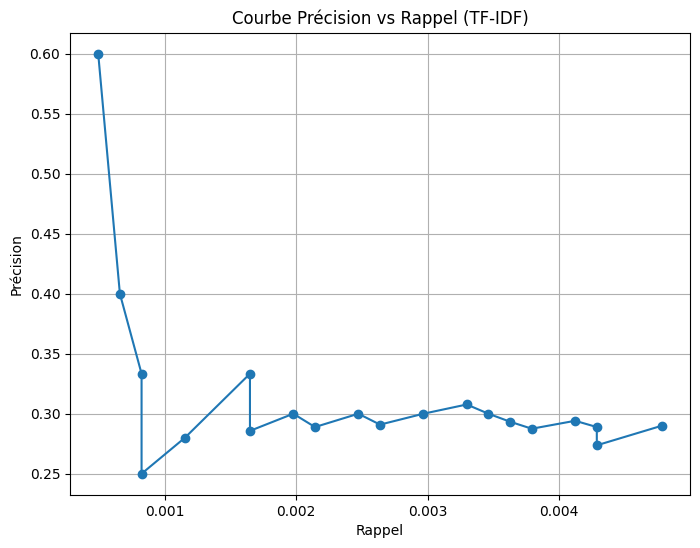

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall_scores, precision_scores, marker='o')
plt.title("Courbe Précision vs Rappel (TF-IDF)")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.grid(True)
plt.show()


### Commentaire

Nous observons un comportement typique des moteurs de recherche 

Plus on ramène des documents, plus on a la chance d'avoir des documents pertinents c'est pour cela que le rappel augmente, par contre plus on ramène aussi des documents moins pertinents c'est pour cela que la précision baisse ici 

Mais avec cette représentation, on ne s'arrête pas uniquement à la précision et au rappel, nous regardons aussi l'ordre de pertinence des documents retournés et ici on se rend compte que le modèle fait un très bon tris ici